In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("./data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# checking for missing values
df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
Annual Income            0
Spending Score(1-100)    0
dtype: int64

In [4]:
# converting annual income from Dollor to Rupee : annual income is in thousands
df['Annual Income'] = df['Annual Income'].apply(lambda x: x*75)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score(1-100)
0,1,Male,19,1125,39
1,2,Male,21,1125,81
2,3,Female,20,1200,6
3,4,Female,23,1200,77
4,5,Female,31,1275,40


In [5]:
# dropping custid col as it is not required
df.drop("CustomerID", inplace=True, axis=1)

In [6]:
df.head()

,Gender,Age,Annual Income,Spending Score(1-100)
0,Male,19,1125,39
1,Male,21,1125,81
2,Female,20,1200,6
3,Female,23,1200,77
4,Female,31,1275,40


In [7]:
df['Savings'] = df['Annual Income']*(1-(df['Spending Score(1-100)'])/100)

In [9]:
# converting cat feature to numbers using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income,Spending Score(1-100),Savings
0,1,19,1125,39,686.25
1,1,21,1125,81,213.75
2,0,20,1200,6,1128.00
3,0,23,1200,77,276.00
4,0,31,1275,40,765.00


In [11]:
# using only Age and Annual Income for further process
df_new = df[['Age','Annual Income']]
df_new.head()

,Age,Annual Income
0,19,1125
1,21,1125
2,20,1200
3,23,1200
4,31,1275


In [12]:
# getting basic stats about the data
df_new.describe()

,Age,Annual Income
count,200.000000,200.000000
mean,38.850000,4542.000000
std,13.969007,1969.854087
min,18.000000,1125.000000
25%,28.750000,3112.500000
50%,36.000000,4612.500000
75%,49.000000,5850.000000
max,70.000000,10275.000000


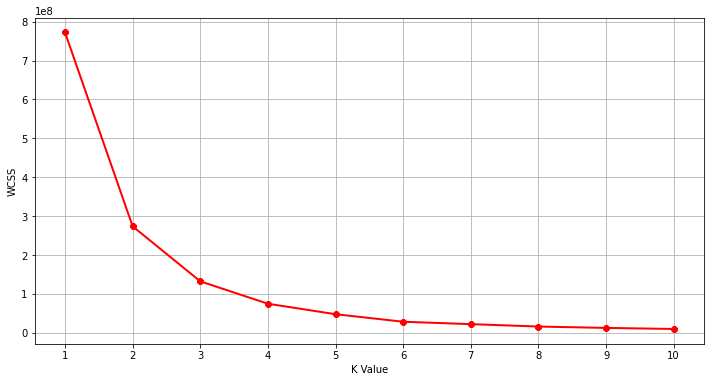

In [13]:
# checking for number of clusters based on elbow method 
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [16]:
# initializing kmeans with n_clusters as 5: for testing purpose 
kmeans = KMeans(n_clusters=5, init="k-means++")

In [17]:
kmeans.fit(df_new)

KMeans(n_clusters=5)

In [18]:
# applying prediction on new data
kmeans.predict([[30,4000]])

array([4])

In [19]:
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = 

In [20]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
df_new.head()

,Age,Annual Income
0,19,1125
1,21,1125
2,20,1200
3,23,1200
4,31,1275


In [22]:
df_new.tail()

,Age,Annual Income
195,35,9000
196,45,9450
197,32,9450
198,32,10275
199,30,10275


In [23]:
# creating new column as cluster and assigning cluster number to it based on the labels
df_new['Cluster'] = pd.Series(kmeans.labels_)
df_new.head()

C:\ProgramData\Anaconda3\envs\fastAI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Annual Income,Cluster
0,19,1125,3
1,21,1125,3
2,20,1200,3
3,23,1200,3
4,31,1275,3


In [24]:
df_new['Cluster'].value_counts()

2    56
4    50
0    42
3    32
1    20
Name: Cluster, dtype: int64

In [25]:
for i in range(5):
    print(f"Cluster {i+1}'s Information")
    print(f"Min values from cluster{i+1}")
    print(df_new[df_new.Cluster==i].min())
    print(f"Max values from cluster{i+1}")    
    print(df_new[df_new.Cluster==i].max())
    
    print("------------------------------------------------------")

Cluster 1's Information
Min values from cluster1
Age                18
Annual Income    2475
Cluster             0
dtype: int64
Max values from cluster1
Age                70
Annual Income    3750
Cluster             0
dtype: int64
------------------------------------------------------
Cluster 2's Information
Min values from cluster2
Age                28
Annual Income    7275
Cluster             1
dtype: int64
Max values from cluster2
Age                 54
Annual Income    10275
Cluster              1
dtype: int64
------------------------------------------------------
Cluster 3's Information
Min values from cluster3
Age                19
Annual Income    5250
Cluster             2
dtype: int64
Max values from cluster3
Age                59
Annual Income    6975
Cluster             2
dtype: int64
------------------------------------------------------
Cluster 4's Information
Min values from cluster4
Age                19
Annual Income    1125
Cluster             3
dtype: int64
Max valu

Here we can see that there are 5 clusters which are created based on Salary.

In [26]:
kmeans.predict([[25,6200]])

array([2])

In [27]:
# saving the model
import pickle
model = open('model.pkl','wb')
pickle.dump(kmeans, model)
model.close()